<H1>AP Train</H1>
<P>Simulation of a neuron as a single electrical compartment and action potential initiation</P> 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from neuron import h
h.load_file('stdrun.hoc') # using neuron library used by the iv graphics

1.0

<H2>Create single compartment</H2>
<P> Topology and biophysical properties of a single-compartment</P>

In [3]:
soma = h.Section(name = 'soma')

In [4]:
# morphology
soma.L = soma.diam = 25.55 # um
soma.Ra = 125 # KOhms

# passive properties
soma.insert('pas')
soma.g_pas = 1/150000 # 150 MOhms
soma.e_pas = -90 # in mV

# active Hodgkin-Huxley Na and K conductances
soma.insert('hh')

<H2>Create instrumentation</H2>
<P>One electrode in the center of the compartment to inject current<P>

In [8]:
stim = h.IClamp(0.5, sec=soma)
stim.dur = 2
stim.amp = 2
stim.delay = 10

<H2>Define a function to perform the simulation</H2>

In [6]:
def mysimulation(tstop, v_init):
    """
    Simulates the membrane potential 
    
    Arguments:
    tstop  -- simulation time (i.e h.tstop)
    v_init -- starting potential (i.e h.v_init)
    
    Returns:
    time and voltage as NumPy arrays
    """
    h.tstop = tstop
    h.v_init = h.v_init
    
    voltage, time = h.Vector(), h.Vector()

    voltage.record( soma(0.5)._ref_v, sec=soma)
    time.record(h._ref_t)
    h.run()
    
    plt.plot( np.array(time), np.array(voltage) )
    plt.xlabel('voltag')

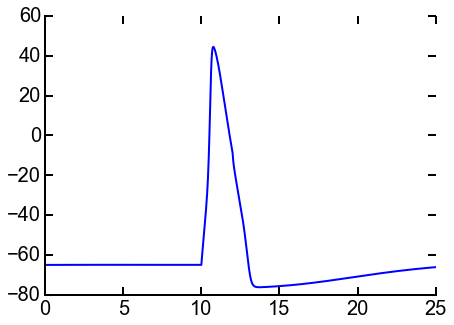

In [9]:
mysimulation(25,-65)